#  Инициализация весов нейронных сетей. Способы регуляризации нейронных сетей. Продвинутые алгоритмы градиентного спуска.

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы: 
* Deep Learning with PyTorch (2020) Авторы: Eli Stevens, Luca Antiga, Thomas Viehmann 
* https://pytorch.org/docs/stable/nn.init.html
* https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/
* https://machinelearningmastery.com/batch-normalization-for-training-of-deep-neural-networks/
* https://pytorch.org/docs/stable/optim.html

## Задачи для совместного разбора

1\. Инициализируйте веса полносвязного слоя единицами, а смещения - нулями.

In [1]:
import torch
import torch.nn as nn


layer = nn.Linear(in_features=10, out_features=5)


nn.init.constant_(layer.weight, 1.0)  
nn.init.zeros_(layer.bias)           

print("Веса:", layer.weight)
print("Смещения:", layer.bias)

C:\Users\Kq\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\torch\utils\_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


Веса: Parameter containing:
tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]], requires_grad=True)
Смещения: Parameter containing:
tensor([0., 0., 0., 0., 0.], requires_grad=True)


2\. Изучите, как работает слой `nn.Dropout` в режиме обучения модели и в режиме использования модели.

Слой nn.Dropout используется для регуляризации нейронных сетей, предотвращая переобучение за счет случайного "отключения" (обнуления) части нейронов во время обучения. nn.Dropout(p=0.5) 50% нейронов будут отключены в режиме обучения

In [3]:
import torch
import torch.nn as nn

model = nn.Sequential(
    nn.Linear(784, 256),
    nn.ReLU(),
    nn.Dropout(p=0.5),  
    nn.Linear(256, 10)
)

In [ ]:
x = torch.randn(1, 784)  # [batch_size, input_features]
model.train()
output_train = model(x)
print("Режим обучения с Dropout активен:", output_train)

model.eval()
output_eval = model(x)
print("Режим оценки без Dropout :", output_eval)

tensor([[ 1.9472e+00,  8.9754e-01,  2.0073e+00, -1.4488e+00,  1.1130e+00,
          1.3186e+00, -5.5211e-02,  1.6260e+00,  3.4731e-01,  2.6647e-01,
         -1.9202e+00,  2.1486e-01,  1.2810e+00,  5.6298e-01,  3.6592e-02,
         -1.8622e+00,  8.5501e-01, -2.6342e-01,  1.0275e+00,  1.3127e+00,
          4.9716e-01,  9.1984e-01, -5.0409e-01,  1.4226e+00, -1.3456e-01,
          4.1868e-01,  1.6234e+00,  7.8640e-01,  9.9510e-03, -5.2328e-01,
         -1.3605e+00,  9.8933e-02, -5.3671e-01, -5.4782e-01,  1.1153e+00,
          3.0547e-01,  9.5170e-02,  1.6118e+00,  1.9021e+00, -5.4147e-01,
          2.4376e-01,  4.9305e-01,  5.3905e-01,  2.1041e-01, -9.1848e-01,
         -1.7555e+00, -6.1333e-01,  1.2845e+00, -2.0644e+00, -8.3922e-02,
         -1.1068e+00, -1.1882e+00, -1.3496e+00,  8.5321e-01,  9.7358e-01,
          2.1710e+00,  5.8334e-01,  1.4725e-01, -1.0811e+00, -3.7518e-01,
         -1.0622e+00,  8.0413e-01, -3.3344e-01,  6.1936e-01, -1.5568e+00,
          5.4150e-02,  6.2496e-01, -1.

3\. Изучите, как работает слой `nn.BatchNorm1d` в режиме обучения модели и в режиме использования модели.

 nn.BatchNorm1d(5) Нормализует 5 фичей

In [ ]:
import torch
import torch.nn as nn

model = nn.Sequential(
    nn.Linear(10, 5),
)


model.train()
x = torch.randn(32, 10)  
output_train = model(x)
print("Режим обучения :\n", output_train[:2])


model.eval()
with torch.no_grad():
    x_eval = torch.randn(1, 10) 
    output_eval = model(x_eval)
    print("Режим оценки с использованием накопленных статистик:\n", output_eval)

Режим обучения :
 tensor([[-0.0239,  1.0319,  0.7521, -0.7687,  0.8266],
        [ 0.2067, -0.1303, -0.4693, -0.1437, -0.8967]],
       grad_fn=<SliceBackward0>)
Режим оценки с использованием накопленных статистик:
 tensor([[-0.1004,  0.3610,  0.1681, -0.1528,  0.2582]])


## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Расширьте класс `torch.nn.Linear`, описав класс `InitializedLinear` и добавив возможность инициализировать веса слоя при помощи функций из пакета `torch.nn.init` (инициализацию bias оставьте по умолчанию). Обратите внимание, что данные функции имеют дополнительные параметры. Данные параметры должны передаваться в момент создания объекта класса `InitializedLinear`.

Пример создания слоя:
```
InitializedLinear(n_features, n_hidden, init_f=nn.init.uniform_, init_args={"a": 0.0, "b": 1.0})
```
init_f - функция инициализации весов
Это одна из функций из модуля torch.nn.init, которая определяет способ начального заполнения весов нейронного слоя

- [ ] Проверено на семинаре

In [10]:
import torch
import torch.nn as nn
import torch.nn.init as init

class InitializedLinear(nn.Linear):
    def __init__(self, in_features, out_features, init_f=init.xavier_uniform_, 
                 init_args=None, bias=True, **kwargs):

        super().__init__(in_features, out_features, bias=bias, **kwargs)
        
   
        if init_args is None:
            init_args = {}
        
        init_f(self.weight, **init_args)
        
 
        if self.bias is not None:
            pass

    def reset_parameters(self):
       
        pass

<p class="task" id="2"></p>

2\. Решите задачу регрессии несколько раз, изменяя способ инициализации весов. Рассмотрите следующие варианты:
* `nn.init.uniform_`
* `nn.init.normal_`
* `nn.init.constant_`
* `nn.xavier_uniform_` 
* `nn.kaiming_uniform_`

Визуализируйте график изменения значений MSE с ходом эпох. Дайте кривым, соответствующие разным способам инициализации, различные цвета и добавьте подписи. Для улучшения читаемости графиков можно рассматривать области экстремальных значений отдельно.

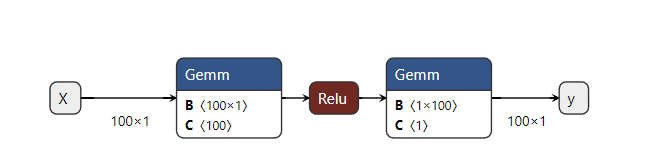

- [ ] Проверено на семинаре

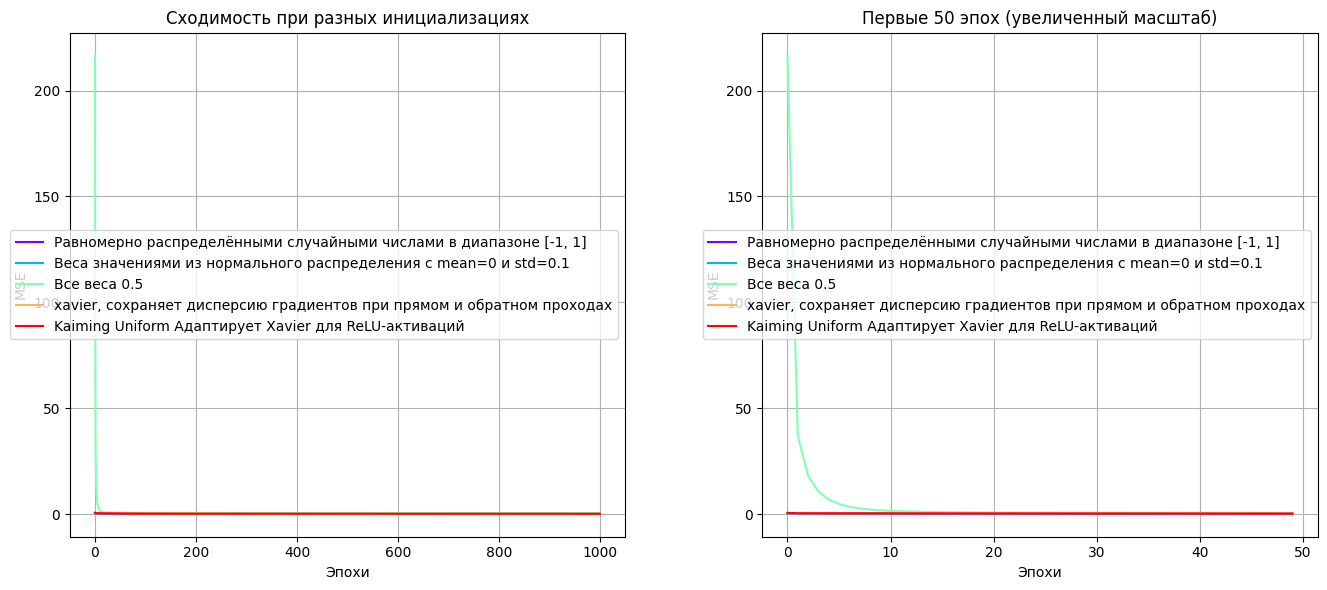

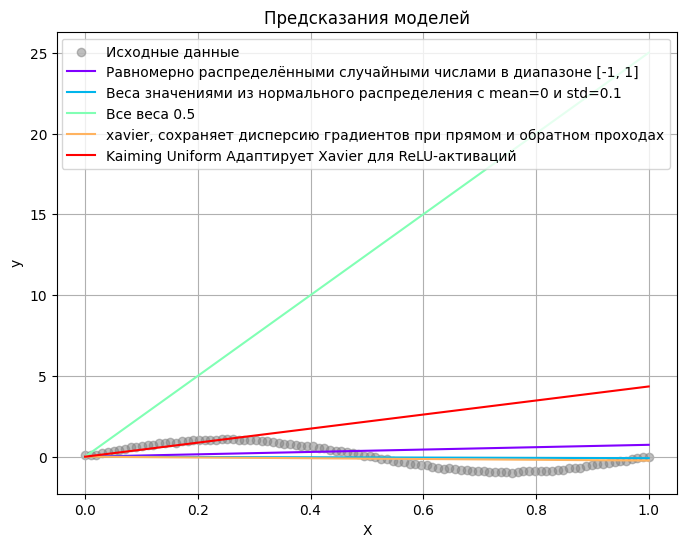

In [ ]:
#График: X (100x1) -> GEMM: B (100x1) C(1)  -> Relu -> GEMM: B (100x1) C(1)  (100x1) -> y

import torch
import torch.nn as nn
import torch.nn.init as init
import matplotlib.pyplot as plt
import numpy as np


X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * torch.pi * X) + 0.1 * torch.rand(X.size())


class RegressionNet(nn.Module):
    def __init__(self, init_method, init_args=None):
        super().__init__()
        self.fc1 = nn.Linear(1, 100)
        self.relu = nn.ReLU()  
        self.fc2 = nn.Linear(100, 1)   

       
        if init_args is None:
            init_args = {}
        init_method(self.fc1.weight, **init_args)
        init_method(self.fc2.weight, **init_args)
        

        init.zeros_(self.fc1.bias) #чтобы первоначальные градиенты зависили только от весов
        init.zeros_(self.fc2.bias)
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        return self.fc2(x)

init_methods = [
    ('Равномерно распределёнными случайными числами в диапазоне [-1, 1]', init.uniform_, {'a': -1, 'b': 1}),
    ('Веса значениями из нормального распределения с mean=0 и std=0.1', init.normal_, {'mean': 0, 'std': 0.1}),
    ('Все веса 0.5', init.constant_, {'val': 0.5}),
    ('xavier, cохраняет дисперсию градиентов при прямом и обратном проходах', init.xavier_uniform_, {'gain': 1.0}),
    ('Kaiming Uniform Адаптирует Xavier для ReLU-активаций', init.kaiming_uniform_, {'mode': 'fan_in', 'nonlinearity': 'relu'})
]


epochs = 1000
learning_rate = 0.01
criterion = nn.MSELoss()


results = {}


for name, method, args in init_methods:
    model = RegressionNet(method, args)
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    
    losses = []
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(X)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    
    results[name] = losses


plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)
colors = plt.cm.rainbow(np.linspace(0, 1, len(init_methods)))
for (name, losses), color in zip(results.items(), colors):
    plt.plot(losses, color=color, label=name)
plt.title('Сходимость при разных инициализациях')
plt.xlabel('Эпохи')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)


plt.subplot(1, 2, 2)
for (name, losses), color in zip(results.items(), colors):
    plt.plot(losses[:50], color=color, label=name)
plt.title('Первые 50 эпох (увеличенный масштаб)')
plt.xlabel('Эпохи')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Дополнительная визуализация предсказаний
plt.figure(figsize=(8, 6))
plt.scatter(X.numpy(), y.numpy(), label='Исходные данные', color='gray', alpha=0.5)

for (name, _), color in zip(results.items(), colors):
    model = RegressionNet(init_methods[[m[0] for m in init_methods].index(name)][1], 
                         init_methods[[m[0] for m in init_methods].index(name)][2])
    with torch.no_grad():
        preds = model(X).numpy()
    plt.plot(X.numpy(), preds, color=color, label=name)

plt.title('Предсказания моделей')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

<p class="task" id="3"></p>

3\. Исследуйте, как добавление дропаута влияет на процесс обучения модели. Решите задачу регрессии несколько раз, изменяя значения вероятности дропаута $p$ от 0 до 0.8. В качестве модели рассмотрите нейронную сеть с одним скрытым слоем.

Визуализируйте график изменения значений $R^2$ в зависимости от вероятности дропаута $p$ на обучающей и тестовой выборке. Визуализируйте на отдельном графике зависимости разности между $R^2$ на обучающей выборки и $R^2$ на тестовой выборке.

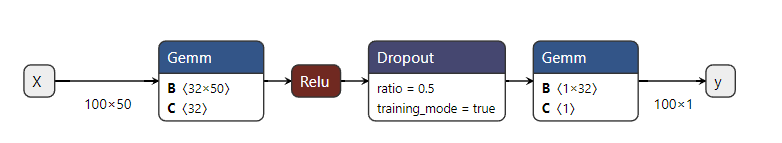

- [ ] Проверено на семинаре

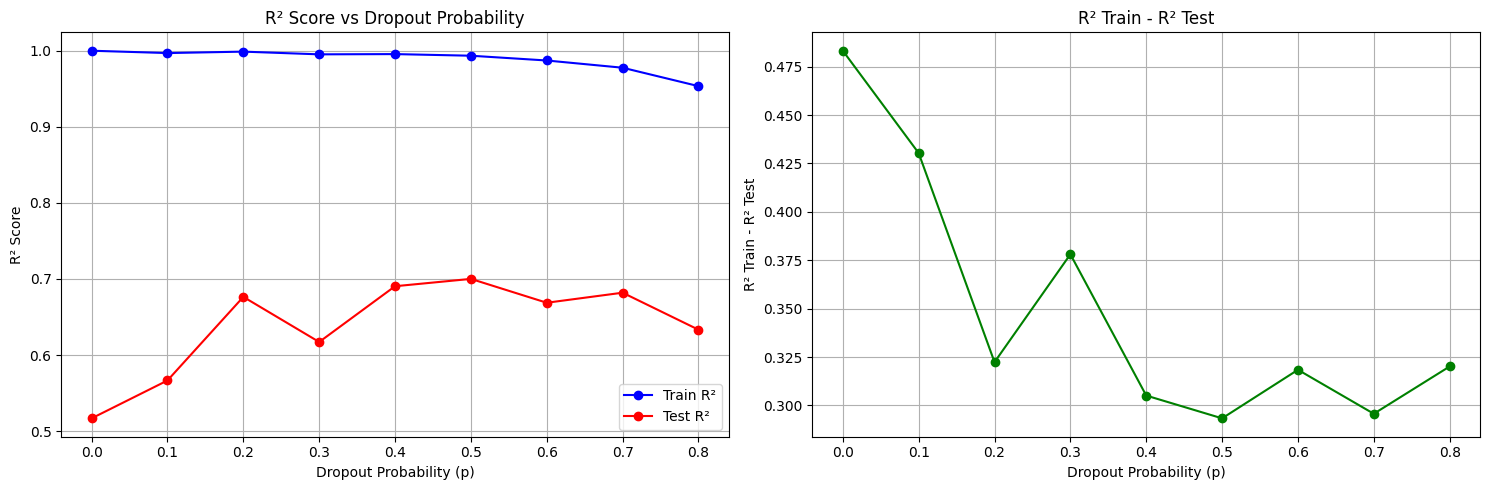

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


torch.manual_seed(42)
X, y, coef = make_regression(
    n_samples=100, 
    n_features=50, 
    n_informative=20, 
    noise=2,
    coef=True,
    random_state=42
)
X = torch.FloatTensor(X)
y = torch.FloatTensor(y).reshape(-1, 1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


class RegressionNet(nn.Module):
    def __init__(self, dropout_prob=0.0):
        super().__init__()
        self.fc1 = nn.Linear(50, 32)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout_prob)
        self.fc2 = nn.Linear(32, 1)
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        return self.fc2(x)


dropout_probs = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
epochs = 1000
lr = 0.01


train_r2 = []
test_r2 = []


for p in dropout_probs:
    model = RegressionNet(dropout_prob=p)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = nn.MSELoss()

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
    

    model.eval()
    with torch.no_grad():
        train_pred = model(X_train)
        test_pred = model(X_test)
        train_r2.append(r2_score(y_train.numpy(), train_pred.numpy()))
        test_r2.append(r2_score(y_test.numpy(), test_pred.numpy()))


plt.figure(figsize=(15, 5))


plt.subplot(1, 2, 1)
plt.plot(dropout_probs, train_r2, 'b-o', label='Train R²')
plt.plot(dropout_probs, test_r2, 'r-o', label='Test R²')
plt.xlabel('Dropout Probability (p)')
plt.ylabel('R² Score')
plt.title('R² Score vs Dropout Probability')
plt.legend()
plt.grid(True)


plt.subplot(1, 2, 2)
diff_r2 = np.array(train_r2) - np.array(test_r2)
plt.plot(dropout_probs, diff_r2, 'g-o')
plt.xlabel('Dropout Probability (p)')
plt.ylabel('R² Train - R² Test')
plt.title('R² Train - R² Test')
plt.grid(True)

plt.tight_layout()
plt.show()

<p class="task" id="4"></p>

4\. Решите задачу регрессии с- и без использования пакетной нормализации(Нормализует выходы слоя перед активацией). Покажите, как меняется результат обучения моделей при различных значениях скорости обучения (0.001, 0.01, 0.1) за одно и то же количество эпох. 

Визуализируйте график изменения значений $R^2$ в зависимости от эпохи при различных значениях скорости обучения с- и без использования пакетной нормализации.

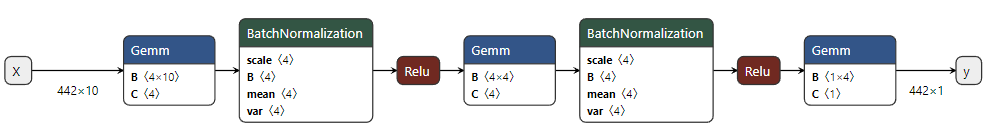

- [ ] Проверено на семинаре

C:\Users\Kq\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\torch\utils\_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(



Learning rate: 0.001

Learning rate: 0.01

Learning rate: 0.1


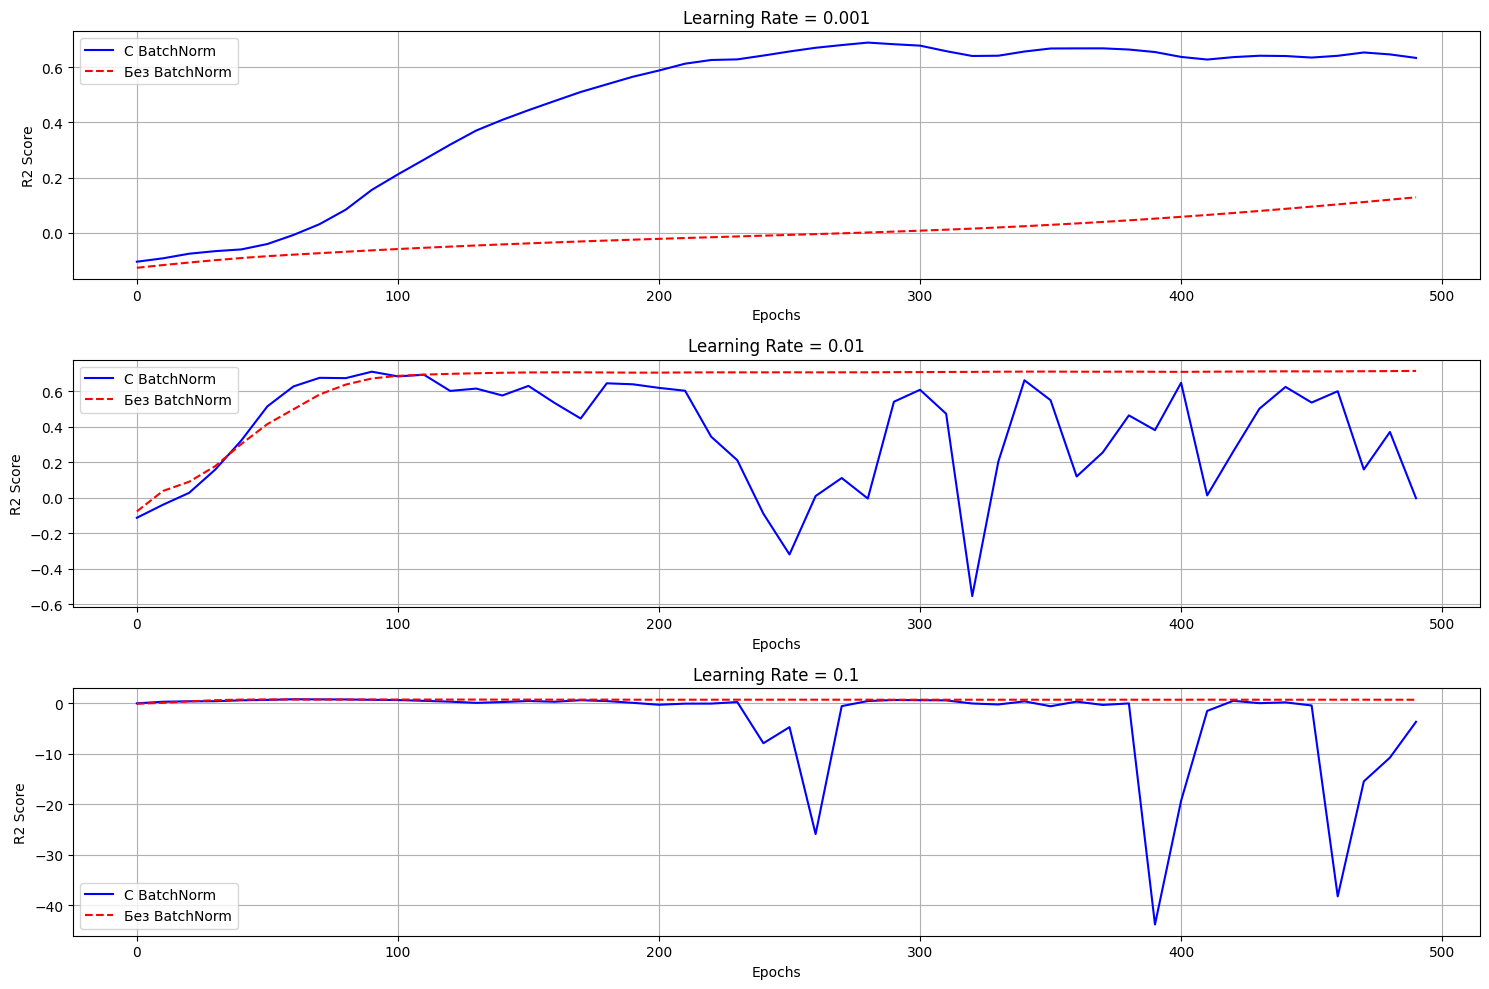

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score

X, y = load_diabetes(return_X_y=True)
X = torch.FloatTensor(X)
y = torch.FloatTensor(y).reshape(-1, 1)
y = (y - y.mean()) / y.std()  


X_train, X_test = X[:400], X[400:]
y_train, y_test = y[:400], y[400:]

class DiabetesNet(nn.Module):
    def __init__(self, use_bn=True):
        super().__init__()
        self.fc1 = nn.Linear(10, 4)
        self.fc2 = nn.Linear(4, 4)
        self.fc3 = nn.Linear(4, 1)
        self.relu = nn.ReLU()
        self.use_bn = use_bn
        
        if use_bn:
            self.bn1 = nn.BatchNorm1d(4)
            self.bn2 = nn.BatchNorm1d(4)
        
    def forward(self, x):
        x = self.fc1(x)
        if self.use_bn:
            x = self.bn1(x)
        x = self.relu(x)
        
        x = self.fc2(x)
        if self.use_bn:
            x = self.bn2(x)
        x = self.relu(x)
        
        return self.fc3(x)


learning_rates = [0.001, 0.01, 0.1]
epochs = 500
batch_size = 32


results = {'with_bn': {}, 'without_bn': {}}

for lr in learning_rates:
    print(f"\nLearning rate: {lr}")
    
    model_bn = DiabetesNet(use_bn=True)
    optimizer = optim.Adam(model_bn.parameters(), lr=lr)
    r2_bn = []
    

    model_no_bn = DiabetesNet(use_bn=False)
    optimizer_no = optim.Adam(model_no_bn.parameters(), lr=lr)
    r2_no_bn = []
    
    for epoch in range(epochs):
        model_bn.train()
        optimizer.zero_grad()
        outputs = model_bn(X_train)
        loss = nn.MSELoss()(outputs, y_train)
        loss.backward()
        optimizer.step()

        model_no_bn.train()
        optimizer_no.zero_grad()
        outputs_no = model_no_bn(X_train)
        loss_no = nn.MSELoss()(outputs_no, y_train)
        loss_no.backward()
        optimizer_no.step()
        
       
        if epoch % 10 == 0:
            model_bn.eval()
            model_no_bn.eval()
            with torch.no_grad():
                r2_bn.append(r2_score(y_test.numpy(), model_bn(X_test).numpy()))
                r2_no_bn.append(r2_score(y_test.numpy(), model_no_bn(X_test).numpy()))
    
    results['with_bn'][lr] = r2_bn
    results['without_bn'][lr] = r2_no_bn

plt.figure(figsize=(15, 10))
x_ticks = range(0, epochs, 10)

for i, lr in enumerate(learning_rates):
    plt.subplot(3, 1, i+1)
    plt.plot(x_ticks, results['with_bn'][lr], 'b-', label='С BatchNorm')
    plt.plot(x_ticks, results['without_bn'][lr], 'r--', label='Без BatchNorm')
    plt.title(f'Learning Rate = {lr}')
    plt.xlabel('Epochs')
    plt.ylabel('R2 Score')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

<p class="task" id="5"></p>

5\. Решите задачу регрессии c использованием различных алгоритмов градиентного спуска. Покажите, как меняется результат обучения моделей при использовании различных алгоритмов (Adam, Adagram, RMSProp, SGD) за одно и то же количество эпох с одной и той же скоростью обучения. Используйте модель с архитектурой, аналогичной модели из предыдущей задачи.

Визуализируйте график изменения значений MAPE в зависимости от эпохи при использовании различных алгоритмов градиентного спуска.

- [ ] Проверено на семинаре

In [17]:
import torch as th
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Загрузка и подготовка данных
def load_boston():
    from sklearn.datasets import fetch_openml
    data = fetch_openml(name='boston', version=1)
    return data.data.values, data.target.values.reshape(-1, 1)

X, y = load_boston()

print(X, y)

x_scaler = StandardScaler()
X = th.FloatTensor(x_scaler.fit_transform(X))
y = th.FloatTensor(y)  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



[[0.00632 18.0 2.31 ... 15.3 396.9 4.98]
 [0.02731 0.0 7.07 ... 17.8 396.9 9.14]
 [0.02729 0.0 7.07 ... 17.8 392.83 4.03]
 ...
 [0.06076 0.0 11.93 ... 21.0 396.9 5.64]
 [0.10959 0.0 11.93 ... 21.0 393.45 6.48]
 [0.04741 0.0 11.93 ... 21.0 396.9 7.88]] [[24. ]
 [21.6]
 [34.7]
 [33.4]
 [36.2]
 [28.7]
 [22.9]
 [27.1]
 [16.5]
 [18.9]
 [15. ]
 [18.9]
 [21.7]
 [20.4]
 [18.2]
 [19.9]
 [23.1]
 [17.5]
 [20.2]
 [18.2]
 [13.6]
 [19.6]
 [15.2]
 [14.5]
 [15.6]
 [13.9]
 [16.6]
 [14.8]
 [18.4]
 [21. ]
 [12.7]
 [14.5]
 [13.2]
 [13.1]
 [13.5]
 [18.9]
 [20. ]
 [21. ]
 [24.7]
 [30.8]
 [34.9]
 [26.6]
 [25.3]
 [24.7]
 [21.2]
 [19.3]
 [20. ]
 [16.6]
 [14.4]
 [19.4]
 [19.7]
 [20.5]
 [25. ]
 [23.4]
 [18.9]
 [35.4]
 [24.7]
 [31.6]
 [23.3]
 [19.6]
 [18.7]
 [16. ]
 [22.2]
 [25. ]
 [33. ]
 [23.5]
 [19.4]
 [22. ]
 [17.4]
 [20.9]
 [24.2]
 [21.7]
 [22.8]
 [23.4]
 [24.1]
 [21.4]
 [20. ]
 [20.8]
 [21.2]
 [20.3]
 [28. ]
 [23.9]
 [24.8]
 [22.9]
 [23.9]
 [26.6]
 [22.5]
 [22.2]
 [23.6]
 [28.7]
 [22.6]
 [22. ]
 [22.9]
 [25


Training with SGD optimizer...
Epoch [50/500], Loss: 7.3295, MAPE: 15.61%
Epoch [100/500], Loss: 3.8952, MAPE: 10.44%
Epoch [150/500], Loss: 3.0315, MAPE: 10.47%
Epoch [200/500], Loss: 2.5405, MAPE: 10.61%
Epoch [250/500], Loss: 2.1971, MAPE: 10.74%
Epoch [300/500], Loss: 1.9308, MAPE: 10.88%
Epoch [350/500], Loss: 1.6817, MAPE: 11.05%
Epoch [400/500], Loss: 1.4910, MAPE: 11.29%
Epoch [450/500], Loss: 1.3088, MAPE: 11.41%
Epoch [500/500], Loss: 1.1415, MAPE: 11.67%

Training with Adam optimizer...
Epoch [50/500], Loss: 522.6945, MAPE: 96.79%
Epoch [100/500], Loss: 458.8226, MAPE: 94.09%
Epoch [150/500], Loss: 391.5590, MAPE: 90.18%
Epoch [200/500], Loss: 323.9687, MAPE: 85.86%
Epoch [250/500], Loss: 259.4645, MAPE: 80.55%
Epoch [300/500], Loss: 199.8236, MAPE: 72.75%
Epoch [350/500], Loss: 147.8651, MAPE: 63.63%
Epoch [400/500], Loss: 104.5469, MAPE: 53.55%
Epoch [450/500], Loss: 71.8198, MAPE: 44.95%
Epoch [500/500], Loss: 44.6446, MAPE: 33.67%

Training with Adagrad optimizer...
Epo

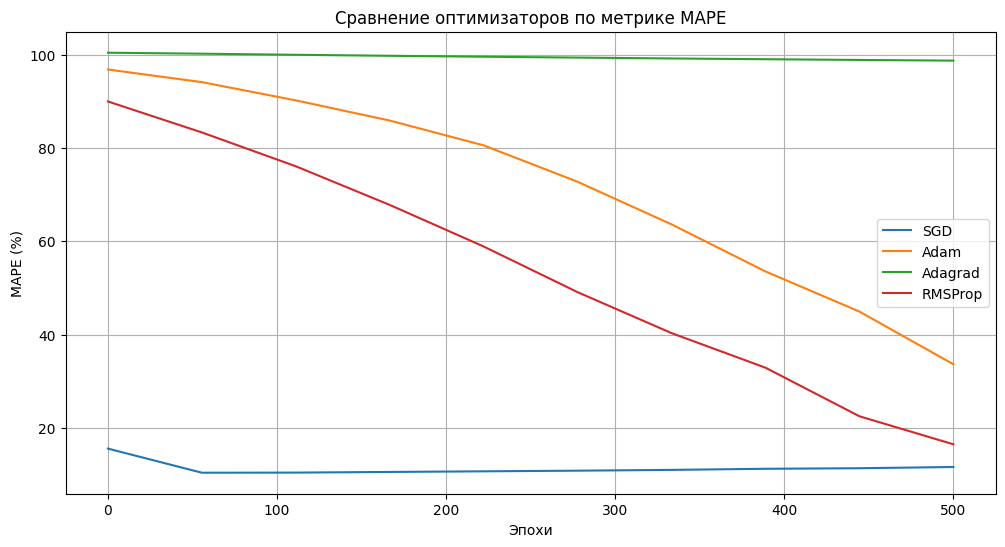

In [ ]:
class BostonNet(nn.Module):
    def __init__(self, input_size, use_bn=True):
        super().__init__()
        self.fc1 = nn.Linear(input_size, 64)  # Увеличил размер слоёв
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.use_bn = use_bn
        
        if use_bn:
            self.bn1 = nn.BatchNorm1d(64)
            self.bn2 = nn.BatchNorm1d(32)
        
    def forward(self, x):
        x = self.fc1(x)
        if self.use_bn:
            x = self.bn1(x)
        x = self.relu(x)
        
        x = self.fc2(x)
        if self.use_bn:
            x = self.bn2(x)
        x = self.relu(x)
        
        x = self.fc3(x)
        return x


def mape(y_true, y_pred, epsilon=1e-7):
    return th.mean(th.abs((y_true - y_pred) / (y_true + epsilon))) * 100

# Параметры обучения
input_size = X.shape[1]
epochs = 500
learning_rate = 0.001  # Уменьшил learning rate

# Инициализация моделей и оптимизаторов
models = {
    'SGD': BostonNet(input_size),
    'Adam': BostonNet(input_size),
    'Adagrad': BostonNet(input_size),
    'RMSProp': BostonNet(input_size)
}

optimizers = {
    'SGD': optim.SGD(models['SGD'].parameters(), lr=learning_rate, momentum=0.9),
    'Adam': optim.Adam(models['Adam'].parameters(), lr=learning_rate),
    'Adagrad': optim.Adagrad(models['Adagrad'].parameters(), lr=learning_rate),
    'RMSProp': optim.RMSprop(models['RMSProp'].parameters(), lr=learning_rate)
}

history = {key: [] for key in models.keys()}


for name, model in models.items():
    optimizer = optimizers[name]
    criterion = nn.MSELoss()
    
    print(f"\nTraining with {name} optimizer...")
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        
        if (epoch+1) % 50 == 0:
            model.eval()
            with th.no_grad():
                test_outputs = model(X_test)
                mape_value = mape(y_test, test_outputs)
                history[name].append(mape_value.item())
                print(f'Epoch [{epoch+1}/{epochs}], MSELoss: {loss.item():.4f}, MAPE: {mape_value:.2f}%')


plt.figure(figsize=(12, 6))
for name, mape_history in history.items():
    plt.plot(np.linspace(0, epochs, len(mape_history)), mape_history, label=name)

plt.title('Сравнение оптимизаторов по метрике MAPE')
plt.xlabel('Эпохи')
plt.ylabel('MAPE (%)')
plt.legend()
plt.grid(True)
plt.show()

<p class="task" id="6"></p>

6\. Решите задачу регрессии c использованием ранней остановки. Разбейте набор данных на обучающую и валидационную выборку в соотношении 80 на 20. Остановите процесс обучения, если целевая метрика (MAPE) не уменьшалась в течении последних $k$ ($k$ - гиперпараметр метода) эпох. В момент остановки выведите сообщение с текущим номером эпохи.

- [ ] Проверено на семинаре

Epoch [50], Loss: 481.7623, Val MAPE: 84.73%
Epoch [100], Loss: 125.3170, Val MAPE: 41.17%
Epoch [150], Loss: 38.6942, Val MAPE: 24.06%
Epoch [200], Loss: 25.0796, Val MAPE: 19.63%
Epoch [250], Loss: 20.5883, Val MAPE: 17.43%
Epoch [300], Loss: 17.7205, Val MAPE: 15.97%
Epoch [350], Loss: 15.5978, Val MAPE: 14.72%
Epoch [400], Loss: 14.0163, Val MAPE: 13.75%
Epoch [450], Loss: 12.7908, Val MAPE: 13.33%
Epoch [500], Loss: 11.8655, Val MAPE: 12.97%
Epoch [550], Loss: 11.1354, Val MAPE: 12.62%
Epoch [600], Loss: 10.5009, Val MAPE: 12.37%
Epoch [650], Loss: 9.9733, Val MAPE: 12.19%
Epoch [700], Loss: 9.4984, Val MAPE: 12.10%
Ранняя остановка на эпохе 742!
Лучший MAPE: 12.06%


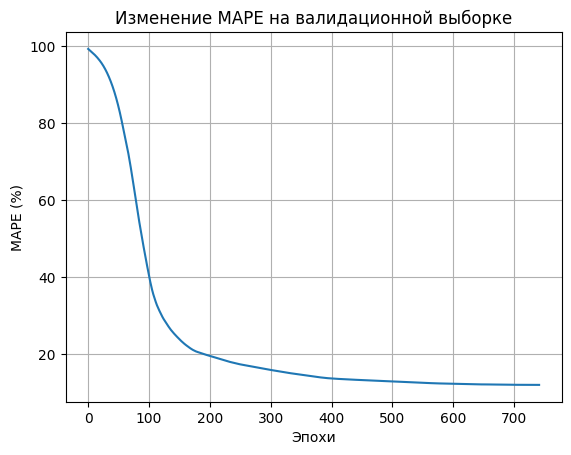

In [ ]:

def load_boston():
    from sklearn.datasets import fetch_openml
    data = fetch_openml(name='boston', version=1)
    return data.data.values, data.target.values.reshape(-1, 1)

X, y = load_boston()




scaler = StandardScaler()
X = th.FloatTensor(scaler.fit_transform(X))
y = th.FloatTensor(y).reshape(-1, 1)


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


class BostonNet(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Функция для вычисления MAPE
def mape(y_true, y_pred, epsilon=1e-7):
    return th.mean(th.abs((y_true - y_pred) / (y_true + epsilon))) * 100


input_size = X.shape[1]
learning_rate = 0.001
k = 20 


model = BostonNet(input_size)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.MSELoss()


best_mape = float('inf')
epochs_no_improve = 0
early_stop = False
history = []


for epoch in range(1000): 
    model.train()
    optimizer.zero_grad()
    

    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    

    loss.backward()
    optimizer.step()
    

    model.eval()
    with th.no_grad():
        val_outputs = model(X_val)
        val_mape = mape(y_val, val_outputs)
        history.append(val_mape.item())
        
    
        if val_mape < best_mape:
            best_mape = val_mape
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1
            
     
        if epochs_no_improve == k:
            print(f'Ранняя остановка на эпохе {epoch+1}!')
            print(f'Лучший MAPE: {best_mape:.2f}%')
            early_stop = True
            break
    
    if (epoch+1) % 50 == 0:
        print(f'Epoch [{epoch+1}], Loss: {loss.item():.4f}, Val MAPE: {val_mape:.2f}%')

if not early_stop:
    print('Обучение завершено без ранней остановки')


import matplotlib.pyplot as plt
plt.plot(history)
plt.title('Изменение MAPE на валидационной выборке')
plt.xlabel('Эпохи')
plt.ylabel('MAPE (%)')
plt.grid(True)
plt.show()

## Обратная связь
- [ ] Хочу получить обратную связь по решению